In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# 1. Define the ViT Patch Embedding Layer
class PatchEmbedding(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, embed_dim):
        super(PatchEmbedding, self).__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.in_channels = in_channels
        self.embed_dim = embed_dim
        
        # Calculate the number of patches (assuming square image and patch)
        self.num_patches = (img_size // patch_size) ** 2
        
        # Linear projection of flattened patches
        self.proj = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)
        
    def forward(self, x):
        # Apply the convolutional patch embedding
        x = self.proj(x)  # Shape: (B, embed_dim, H/p, W/p)
        x = x.flatten(2)  # Flatten spatial dimensions (H/p * W/p)
        x = x.transpose(1, 2)  # Shape: (B, num_patches, embed_dim)
        return x




Files already downloaded and verified


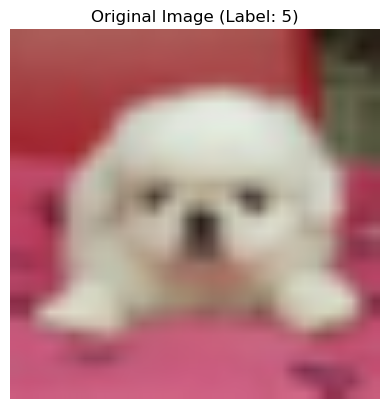

In [2]:
# 2. Load CIFAR-10 Dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(224),  # Resize to 224x224 to match ViT input size
])

# Load CIFAR-10 dataset
dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

# Get one image from the dataset
image, label = next(iter(dataloader))

# 3. Visualize the original image
plt.imshow(image.squeeze().permute(1, 2, 0))
plt.title(f'Original Image (Label: {label.item()})')
plt.axis('off')
plt.show()


In [3]:

# 4. Apply Patch Embedding
img_size = 224  # Resize image to 224x224
patch_size = 16  # Patch size of 16x16
embed_dim = 768  # Standard ViT embedding dimension

patch_embedding_layer = PatchEmbedding(img_size, patch_size, 3, embed_dim)
embedded_patches = patch_embedding_layer(image)


IndexError: index 3 is out of bounds for dimension 2 with size 3

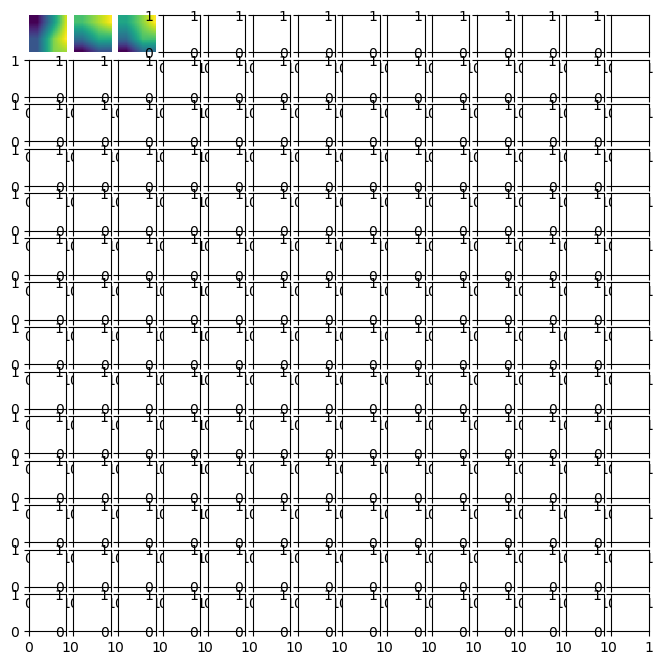

In [5]:
# 5. Visualize the Patches Before Embedding (in original image space)
patches = image.squeeze().permute(1, 2, 0).unfold(0, patch_size, patch_size).unfold(1, patch_size, patch_size)

# Get the patch grid size
patch_grid_size = patches.size(1)

# Create a grid to display the patches
fig, ax = plt.subplots(patch_grid_size, patch_grid_size, figsize=(8, 8))

for i in range(patch_grid_size):
    for j in range(patch_grid_size):
        patch = patches[0, i, j].numpy()
        ax[i, j].imshow(patch)
        ax[i, j].axis('off')

plt.show()